In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df1=pd.read_csv("/content/my_flie.csv")

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103549 entries, 0 to 103548
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         103549 non-null  int64  
 1   order_date         103549 non-null  object 
 2   order_id           103549 non-null  int64  
 3   order_number_x     103549 non-null  object 
 4   customer_id        103549 non-null  int64  
 5   customer_name      103549 non-null  object 
 6   poc_name           103549 non-null  object 
 7   poc_id             103549 non-null  int64  
 8   amount_x           103549 non-null  float64
 9   discount           103549 non-null  float64
 10  net_order_amount   103549 non-null  float64
 11  profit_x           103549 non-null  float64
 12  order_status       103549 non-null  object 
 13  warehouse_name     103549 non-null  object 
 14  warehouse_id       103549 non-null  int64  
 15  order_number_y     103549 non-null  object 
 16  or

In [65]:
import pandas as pd

# Assuming your original DataFrame is named 'df'
columns_to_remove = [
    'order_id',
    'order_number_x',
    'customer_id',
    'poc_id',
    'net_order_amount',
    'warehouse_id',
    'order_number_y',
    'order_item_id',
    'order_status',
    'invoiced_quantity',
    'poc_name'
]

# Create new DataFrame without the specified columns
df = df1.drop(columns=columns_to_remove)


In [66]:
df.head()

,Unnamed: 0,order_date,customer_name,amount_x,discount,profit_x,warehouse_name,item_name,quantity,mrp,price_per_unit,amount_y,discount_amount,profit_y,item_name_clean,item_id
0,0,2025-04-03,Anshu General Store Sector 34,19125.00,1650.00,0.0,Noida,Ruchi Gold Palm Pouch(1L),15,1275.0,1165.0,19125.0,1650.0,0.0,ruchi gold palm pouch1l,0
1,1,2025-01-30,bhai di rasoi,9670.48,735.48,-56.4,Greater NOIDA,Ruchi Gold Palm Pouch(1L),2,1350.0,1250.0,2700.0,200.0,0.0,ruchi gold palm pouch1l,0
2,2,2025-01-30,bhai di rasoi,9670.48,735.48,-56.4,Greater NOIDA,Fortune Soya Pouch(1L),1,2450.0,2300.0,2450.0,150.0,-10.0,fortune soya pouch1l,1
3,4,2025-01-30,bhai di rasoi,9670.48,735.48,-56.4,Greater NOIDA,Shudh Oil,1,1650.0,1510.0,1650.0,140.0,-14.0,shudh oil,3
4,5,2025-02-12,Shama chicken corner beta,62500.00,5000.00,-650.0,Noida,Oil Ruchi Gold Palm Pouch (770Gm),50,1250.0,1150.0,62500.0,5000.0,-650.0,oil ruchi gold palm pouch 770gm,4


In [67]:
# Convert date to datetime and extract features
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year
df['order_day'] = df['order_date'].dt.day
df['order_dayofweek'] = df['order_date'].dt.dayofweek

# Calculate days since first order for each customer
df['days_since_first_order'] = (df['order_date'] - df.groupby('customer_name')['order_date'].transform('min')).dt.days

# Create customer-product interaction features
df['customer_product'] = df['customer_name'].astype(str) + "_" + df['item_id'].astype(str)

In [68]:
df.head()

,Unnamed: 0,order_date,customer_name,amount_x,discount,profit_x,warehouse_name,item_name,quantity,mrp,...,discount_amount,profit_y,item_name_clean,item_id,order_month,order_year,order_day,order_dayofweek,days_since_first_order,customer_product
0,0,2025-04-03,Anshu General Store Sector 34,19125.00,1650.00,0.0,Noida,Ruchi Gold Palm Pouch(1L),15,1275.0,...,1650.0,0.0,ruchi gold palm pouch1l,0,4,2025,3,3,182,Anshu General Store Sector 34 _0
1,1,2025-01-30,bhai di rasoi,9670.48,735.48,-56.4,Greater NOIDA,Ruchi Gold Palm Pouch(1L),2,1350.0,...,200.0,0.0,ruchi gold palm pouch1l,0,1,2025,30,3,14,bhai di rasoi _0
2,2,2025-01-30,bhai di rasoi,9670.48,735.48,-56.4,Greater NOIDA,Fortune Soya Pouch(1L),1,2450.0,...,150.0,-10.0,fortune soya pouch1l,1,1,2025,30,3,14,bhai di rasoi _1
3,4,2025-01-30,bhai di rasoi,9670.48,735.48,-56.4,Greater NOIDA,Shudh Oil,1,1650.0,...,140.0,-14.0,shudh oil,3,1,2025,30,3,14,bhai di rasoi _3
4,5,2025-02-12,Shama chicken corner beta,62500.00,5000.00,-650.0,Noida,Oil Ruchi Gold Palm Pouch (770Gm),50,1250.0,...,5000.0,-650.0,oil ruchi gold palm pouch 770gm,4,2,2025,12,2,112,Shama chicken corner beta _4


In [69]:
df.shape

(103549, 22)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103549 entries, 0 to 103548
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              103549 non-null  int64         
 1   order_date              103549 non-null  datetime64[ns]
 2   customer_name           103549 non-null  object        
 3   amount_x                103549 non-null  float64       
 4   discount                103549 non-null  float64       
 5   profit_x                103549 non-null  float64       
 6   warehouse_name          103549 non-null  object        
 7   item_name               103549 non-null  object        
 8   quantity                103549 non-null  int64         
 9   mrp                     103549 non-null  float64       
 10  price_per_unit          103549 non-null  float64       
 11  amount_y                103549 non-null  float64       
 12  discount_amount         103549

In [71]:
import pandas as pd
grouped = df.groupby('warehouse_name')
warhouse_data = [group for _, group in grouped]
warhouse_dataframes_dict = {name: group for name, group in grouped}

In [72]:
warhouse_data[1]

,Unnamed: 0,order_date,customer_name,amount_x,discount,profit_x,warehouse_name,item_name,quantity,mrp,...,discount_amount,profit_y,item_name_clean,item_id,order_month,order_year,order_day,order_dayofweek,days_since_first_order,customer_product
6,7,2024-12-30,Lucknow kirana store,1700.00,0.00,-88.0,Gomti Nagar,Mahakosh Soya Oil Pouch(1L),1,1700.000,...,0.00,-88.0,mahakosh soya oil pouch1l,6,12,2024,30,0,46,Lucknow kirana store_6
10,11,2025-01-12,Munna General Store,342.19,36.19,-23.9,Gomti Nagar,Kezar Aata,5,36.438,...,17.19,-9.9,kezar aata,10,1,2025,12,6,14,Munna General Store_10
11,12,2025-01-12,Munna General Store,342.19,36.19,-23.9,Gomti Nagar,Mahakosh Mustard Oil Pouch (1L),1,160.000,...,19.00,-14.0,mahakosh mustard oil pouch 1l,11,1,2025,12,6,14,Munna General Store_11
12,13,2025-01-17,SAUBHAGYA MEGA MART,3520.00,300.00,-60.0,Gomti Nagar,Shreshtha Aata,2,1760.000,...,300.00,-60.0,shreshtha aata,12,1,2025,17,4,41,SAUBHAGYA MEGA MART _12
13,14,2025-01-21,CHAMPARAN AUNNA MUTTON,1700.00,50.00,20.0,Gomti Nagar,Prakash Aata,1,1700.000,...,50.00,20.0,prakash aata,8,1,2025,21,1,110,CHAMPARAN AUNNA MUTTON_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103539,115083,2024-12-26,ramu tea stall,4690.00,490.00,-320.0,Gomti Nagar,Fortune Soya Tin(15L),1,2290.000,...,250.00,-180.0,fortune soya tin15l,32,12,2024,26,3,0,ramu tea stall_32
103540,115084,2024-12-26,ramu tea stall,4690.00,490.00,-320.0,Gomti Nagar,Bawarchi Vanaspati Pouch 1ltr,1,2400.000,...,240.00,-140.0,bawarchi vanaspati pouch 1ltr,76,12,2024,26,3,0,ramu tea stall_76
103541,115085,2024-12-26,Maa Bindwa,1650.00,130.00,-60.0,Gomti Nagar,Kezar Aata,1,1650.000,...,130.00,-60.0,kezar aata,10,12,2024,26,3,84,Maa Bindwa_10
103547,115091,2024-12-26,Shawarna Wala Al Baik,10690.00,700.00,10.0,Gomti Nagar,Fryola Palm,3,2390.000,...,450.00,60.0,fryola palm,46,12,2024,26,3,67,Shawarna Wala Al Baik_46


In [73]:
warhouse_data[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13718 entries, 22 to 103513
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              13718 non-null  int64         
 1   order_date              13718 non-null  datetime64[ns]
 2   customer_name           13718 non-null  object        
 3   amount_x                13718 non-null  float64       
 4   discount                13718 non-null  float64       
 5   profit_x                13718 non-null  float64       
 6   warehouse_name          13718 non-null  object        
 7   item_name               13718 non-null  object        
 8   quantity                13718 non-null  int64         
 9   mrp                     13718 non-null  float64       
 10  price_per_unit          13718 non-null  float64       
 11  amount_y                13718 non-null  float64       
 12  discount_amount         13718 non-null  float64  

In [74]:
if not pd.api.types.is_datetime64_any_dtype(df['order_date']):
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [75]:
def create_product_date_pivot(data, warehouse_name=None):
    """
    Create a pivot table showing total quantity of each product sold on each date

    Parameters:
    data (DataFrame): The input dataframe
    warehouse_name (str, optional): If provided, filter data for this warehouse

    Returns:
    DataFrame: Pivot table with dates as rows and products as columns
    """
    # Filter for specific warehouse if provided
    if warehouse_name is not None:
        data = data[data['warehouse_name'] == warehouse_name]

    # Group by date and product, summing the quantities
    grouped = data.groupby(['order_date', 'item_name_clean'])['quantity'].sum().reset_index()

    # Create pivot table
    pivot = grouped.pivot(index='order_date', columns='item_name_clean', values='quantity')

    # Fill NaN values with 0 (days when a product wasn't sold)
    pivot = pivot.fillna(0)

    # Convert values to integers since quantities should be whole numbers
    pivot = pivot.astype(int)

    # Reset index to make order_date a column
    pivot = pivot.reset_index()

    return pivot

In [76]:
# Create pivot tables for each warehouse
warehouses = df['warehouse_name'].unique()
warehouse_pivots = {}

In [77]:
for warehouse in warehouses:
    print(f"Creating pivot table for warehouse: {warehouse}")
    pivot_table = create_product_date_pivot(df, warehouse)
    warehouse_pivots[warehouse] = pivot_table

    # Display sample of pivot table
    print(f"\nSample of pivot table for warehouse {warehouse}:")
    print(pivot_table.head())
    print(f"Shape: {pivot_table.shape[0]} dates × {pivot_table.shape[1]} columns (including date column)")
    print(f"Total products: {pivot_table.shape[1] - 1}")
    print("-" * 80)

Creating pivot table for warehouse: Noida

Sample of pivot table for warehouse Noida:
item_name_clean order_date  aashirwad chakki atta 10kg  \
0               2024-09-30                          12   
1               2024-10-01                          21   
2               2024-10-02                           0   
3               2024-10-03                          16   
4               2024-10-04                          28   

item_name_clean  aashirwad chakki atta 5kg  ambey chakki aata  \
0                                        8                  0   
1                                       14                 41   
2                                        0                  1   
3                                       10                 34   
4                                       17                 26   

item_name_clean  ambey mill aata  ambey patent maida  ambey sujirava  \
0                              0                   0               0   
1                             

In [78]:
# Also create an overall pivot table combining all warehouses
print("\nCreating overall pivot table for all warehouses combined:")
overall_pivot = create_product_date_pivot(df)

print("\nSample of overall pivot table (all warehouses):")
print(overall_pivot.head())
print(f"Shape: {overall_pivot.shape[0]} dates × {overall_pivot.shape[1]} columns (including date column)")
print(f"Total products: {overall_pivot.shape[1] - 1}")



Creating overall pivot table for all warehouses combined:

Sample of overall pivot table (all warehouses):
item_name_clean order_date  7 star rice  a1 arhar dal  \
0               2024-09-30            0             0   
1               2024-10-01            0             0   
2               2024-10-02            0             1   
3               2024-10-03            0             0   
4               2024-10-04            0             0   

item_name_clean  aashirwad chakki atta 10kg  aashirwad chakki atta 5kg  \
0                                        12                          8   
1                                        21                         14   
2                                         0                          0   
3                                        16                         10   
4                                        28                         17   

item_name_clean  aata nourish 10kg  adani mota besan  adani patla besan  \
0                            

In [79]:
# Optional: Save pivot tables to CSV
print("\nTo save these pivot tables, you can use:")
print("overall_pivot.to_csv('overall_product_quantities_by_date.csv')")
print("for warehouse, pivot in warehouse_pivots.items():")
print("    pivot.to_csv(f'{warehouse}_product_quantities_by_date.csv')")



To save these pivot tables, you can use:
overall_pivot.to_csv('overall_product_quantities_by_date.csv')
for warehouse, pivot in warehouse_pivots.items():
    pivot.to_csv(f'{warehouse}_product_quantities_by_date.csv')


In [80]:
overall_pivot.to_csv('overall_product_quantities_by_date.csv')

In [81]:
for warehouse, pivot in warehouse_pivots.items():
    pivot.to_csv(f'{warehouse}_product_quantities_by_date.csv')

In [82]:
!pip install croston

In [83]:
import pandas as pd
import numpy as np
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
import croston
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [84]:
# Load the data
import pandas as pd
df = pd.read_csv('/content/Ayodhya_product_quantities_by_date.csv', parse_dates=['order_date'])
df = df.drop(columns=['Unnamed: 0'])

In [85]:
# Set the date as index and ensure full date range
df.set_index('order_date', inplace=True)
df = df.asfreq('D').fillna(0)  # Fill missing dates with 0 sales


In [86]:
df

,a1 arhar dal,adani mota besan,adani patla besan,ajinomoto,ajmal basmati rice,arhar dal,ashok chicken masala pkt100gm,ashok garam masala pkt100gm,ashok garam masala pkt50gm,ashok haldi powder pkt50gm,...,soyum soya pouch,soyum soya tin15l v,steam rice,sunny maida,sunny ravasuji,swastik maida,swastik suji rava,tata salt pkt1kg,tej patta sabut,tiger arhar dal
order_date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-10-02,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-03,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-10-04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
2025-04-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,1.0
2025-04-08,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.0,2.0,0.0,0.0,0.0,2.0,8.0,0.0,1.0


In [87]:
# Function to classify products based on demand pattern
def classify_product(series):
    zero_percentage = (series == 0).mean()
    if zero_percentage > 0.8:
        return 'intermittent'
    elif zero_percentage > 0.5:
        return 'lumpy'
    else:
        return 'smooth'

In [88]:

product_classes = {}
for product in df.columns:
    product_classes[product] = classify_product(df[product])

In [89]:
df

,a1 arhar dal,adani mota besan,adani patla besan,ajinomoto,ajmal basmati rice,arhar dal,ashok chicken masala pkt100gm,ashok garam masala pkt100gm,ashok garam masala pkt50gm,ashok haldi powder pkt50gm,...,soyum soya pouch,soyum soya tin15l v,steam rice,sunny maida,sunny ravasuji,swastik maida,swastik suji rava,tata salt pkt1kg,tej patta sabut,tiger arhar dal
order_date,,,,,,,,,,,,,,,,,,,,,
2024-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2024-10-02,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-03,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-10-04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
2025-04-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,1.0
2025-04-08,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.0,2.0,0.0,0.0,0.0,2.0,8.0,0.0,1.0


In [90]:
X_train = df.iloc[:-14]
X_test = df.iloc[-14:]

In [91]:
X_test

,a1 arhar dal,adani mota besan,adani patla besan,ajinomoto,ajmal basmati rice,arhar dal,ashok chicken masala pkt100gm,ashok garam masala pkt100gm,ashok garam masala pkt50gm,ashok haldi powder pkt50gm,...,soyum soya pouch,soyum soya tin15l v,steam rice,sunny maida,sunny ravasuji,swastik maida,swastik suji rava,tata salt pkt1kg,tej patta sabut,tiger arhar dal
order_date,,,,,,,,,,,,,,,,,,,,,
2025-03-28,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2025-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-03-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,3.0
2025-03-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
2025-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-04-02,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2025-04-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
2025-04-04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0
2025-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0


In [92]:
def forecast_product(product_series, product_type, forecast_horizon=14):
    # Prepare data
    y = product_series.reset_index()
    y.columns = ['ds', 'y']

    if product_type == 'smooth':
        # Use Prophet for smooth demand
        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        model.fit(y)
        future = model.make_future_dataframe(periods=forecast_horizon)
        forecast = model.predict(future)
        predictions = forecast.tail(forecast_horizon)['yhat'].values
        predictions = np.where(predictions < 0, 0, predictions)  # Ensure no negative predictions

    elif product_type in ['intermittent', 'lumpy']:
        # Use Croston's method for intermittent/lumpy demand
        try:
            predictions = croston(y['y'].values, forecast_horizon)
        except:
            predictions = np.zeros(forecast_horizon)
    else:
        # Default to naive forecast
        predictions = np.full(forecast_horizon, y['y'].mean())

    return predictions

In [93]:
# Generate forecasts for all products
forecast_dates = pd.date_range(start=X_train.index[-1] + pd.Timedelta(days=1), periods=14)
forecast_results = pd.DataFrame(index=forecast_dates)

for product in tqdm(X_train.columns, desc="Forecasting products"):
    product_type = product_classes[product]
    forecasts = forecast_product(X_train[product], product_type)
    forecast_results[product] = forecasts

Forecasting products:   0%|          | 0/124 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu/ztmezzc5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu/x9s7t19o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23949', 'data', 'file=/tmp/tmp0wu5d2nu/ztmezzc5.json', 'init=/tmp/tmp0wu5d2nu/x9s7t19o.json', 'output', 'file=/tmp/tmp0wu5d2nu/prophet_modelh2g3lvcu/prophet_model-20250417202642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
Forecasting products:  11%|█▏        | 14/124 [00:00<00:01, 83.06it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu/7jxgpa_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu

In [94]:
# Post-processing: round to integers and ensure no negative values
forecast_results = forecast_results.round().clip(lower=0)

# Save forecasts to CSV
forecast_results.to_csv('14_day_product_forecasts.csv')


In [95]:
# Plot some sample forecasts
def plot_sample_forecasts(product_names, n_days=60):
    plt.figure(figsize=(15, 8))
    for product in product_names[:5]:  # Limit to 5 products for clarity
        # Historical data
        plt.plot(df.index[-n_days:], df[product][-n_days:], label=f'{product} - Actual')

        # Forecast
        plt.plot(forecast_results.index, forecast_results[product], '--',
                label=f'{product} - Forecast')

    plt.title('Product Demand Forecast (Next 14 Days)')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.grid()
    plt.show()

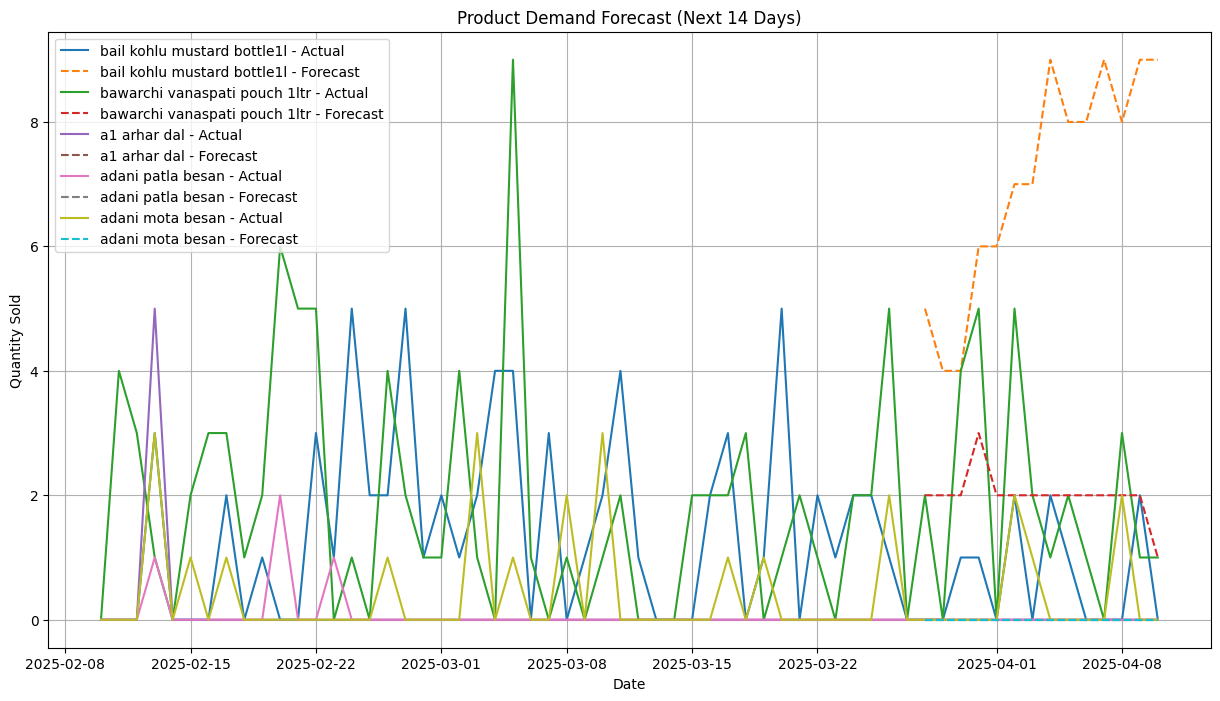

In [96]:
# Select some sample products to plot (mix of demand types)
sample_products = [
    p for p in df.columns
    if product_classes[p] == 'smooth' and df[p].sum() > 0
][:2] + [
    p for p in df.columns
    if product_classes[p] == 'intermittent' and df[p].sum() > 0
][:2] + [
    p for p in df.columns
    if product_classes[p] == 'lumpy' and df[p].sum() > 0
][:1]

plot_sample_forecasts(sample_products)


In [104]:
# Generate forecasts for all products
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14)
forecast_results = pd.DataFrame(index=forecast_dates)

for product in tqdm(df.columns, desc="Forecasting products"):
    product_type = product_classes[product]
    forecasts = forecast_product(df[product], product_type)
    forecast_results[product] = forecasts

Forecasting products:   0%|          | 0/124 [00:00<?, ?it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu/6iukvvqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu/zgbjimvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51566', 'data', 'file=/tmp/tmp0wu5d2nu/6iukvvqz.json', 'init=/tmp/tmp0wu5d2nu/zgbjimvo.json', 'output', 'file=/tmp/tmp0wu5d2nu/prophet_modelpv2_e078/prophet_model-20250417202945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
Forecasting products:  11%|█▏        | 14/124 [00:00<00:01, 84.34it/s]DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu/w_g_0h3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wu5d2nu

In [101]:
import pandas as pd
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(forecast_results, X_test)
print(f"R-squared (R²) Accuracy: {r2:.4f}")

R-squared (R²) Accuracy: 0.7529


In [ ]:
# Generate forecasts for all products
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14)
forecast_results = pd.DataFrame(index=forecast_dates)

for product in tqdm(df.columns, desc="Forecasting products"):
    product_type = product_classes[product]
    forecasts = forecast_product(df[product], product_type)
    forecast_results[product] = forecasts

In [105]:
# Post-processing: round to integers and ensure no negative values
forecast_results_pred = forecast_results.round().clip(lower=0)

# Save forecasts to CSV
forecast_results_pred.to_csv('14_day_product_forecasts.csv')


In [106]:
# Plot some sample forecasts
def plot_sample_forecasts(product_names, n_days=60):
    plt.figure(figsize=(15, 8))
    for product in product_names[:5]:  # Limit to 5 products for clarity
        # Historical data
        plt.plot(df.index[-n_days:], df[product][-n_days:], label=f'{product} - Actual')

        # Forecast
        plt.plot(forecast_results.index, forecast_results[product], '--',
                label=f'{product} - Forecast')

    plt.title('Product Demand Forecast (Next 14 Days)')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.grid()
    plt.show()

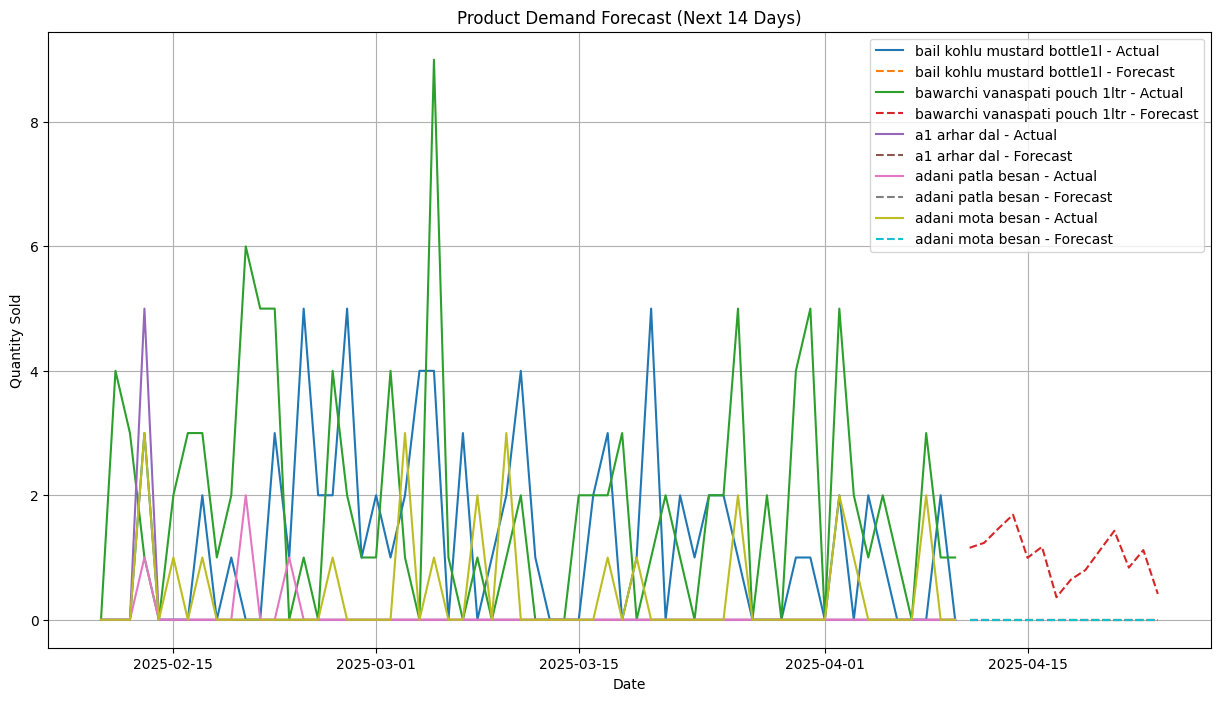

In [107]:
# Select some sample products to plot (mix of demand types)
sample_products = [
    p for p in df.columns
    if product_classes[p] == 'smooth' and df[p].sum() > 0
][:2] + [
    p for p in df.columns
    if product_classes[p] == 'intermittent' and df[p].sum() > 0
][:2] + [
    p for p in df.columns
    if product_classes[p] == 'lumpy' and df[p].sum() > 0
][:1]

plot_sample_forecasts(sample_products)


In [113]:
# Display top products forecast
print("\nTop 10 Products Forecast (Next 14 Days):")
top_products = forecast_results.sum().sort_values(ascending=False).head(10)
top_products = top_products.round().astype(int )
print(top_products)

# Display forecast summary
print("\nForecast Summary:")
print(f"Total products forecasted: {len(df.columns)}")
print(f"Forecast period: {forecast_results.index[0].date()} to {forecast_results.index[-1].date()}")
print(f"Total units forecasted across all products: {int(forecast_results.sum().sum())}")


Top 10 Products Forecast (Next 14 Days):
masodha double filter sugar    772
sapna gold maida               573
madhur gold maida              271
ruchi gold palm pouch1l        195
hum tum rice                   165
tata salt pkt1kg               146
normal sugar                   108
ruchi gold palm                100
fortune soya pouch1l            80
sapna gold aata                 62
dtype: int64

Forecast Summary:
Total products forecasted: 124
Forecast period: 2025-04-11 to 2025-04-24
Total units forecasted across all products: 2671
